<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/genetic-algorithm-01-knapsack-problem/blob/master/01_Knapsack_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0,1 Knapsack using Genetic Algorithm

In [0]:
import random
import math
import matplotlib.pyplot as plt

**Defining Chromosome class**

In [0]:
class Chromosome:
	def __init__(self,chromosomeLength):
		self.genes=[]
		self.chromosomeLength=chromosomeLength
	def initializeChromosome(self):	
		for i in range(self.chromosomeLength):
			self.genes.append(random.randint(0,1))
		self.fitness=0
		self.calculateFitness()

	#Fitness Function
	def calculateFitness(self):
		self.fitness=0
		sumVal=0
		wt=0
		for i in range(self.chromosomeLength):
			if(self.genes[i]==1):
				sumVal+=V[i]
				wt+=W[i]
			self.fitness=-1 if(wt>MW) else sumVal
	def displayChromosome(self):
		for i in range(self.chromosomeLength):
			print(self.genes[i],end="")
		self.calculateFitness()
		#print("   [",end="")
		print("    [%.2f]" % self.fitness)
    
	def copyChromosome(self):
		copy=[]
		for i in range(self.chromosomeLength):
			copy.append(self.genes[i])
		return copy

	#Mutation (defined on chromosome)
	def mutation(self):
		mutationPoint=random.randint(0,chromosomeLength-1)
		print("Mutation Point: ",mutationPoint)
		self.genes[mutationPoint]=1 if self.genes[mutationPoint]==0 else 0
		#print()

**Defining Population class**

In [0]:
class Population:
	def __init__(self,popSize,chromosomeLength):
		
		self.populationSize=popSize
		self.sumFitness=0
		#self.chromosomeLength=chromosomeLength
		self.chromosome=[]
    
	def intializePopulation(self):
		for i in range(self.populationSize):
			self.chromosome.append(Chromosome(chromosomeLength))
			self.chromosome[i].initializeChromosome()
			self.sumFitness+=self.chromosome[i].fitness
      
	def displayPopulation(self):
		for i in range(self.populationSize):
			self.chromosome[i].displayChromosome()
      
	def sortPopulation(self):
		for i in range(self.populationSize):
			for j in range(self.populationSize-i-1):
				if(self.chromosome[j].fitness<self.chromosome[j+1].fitness):
					self.chromosome[j],self.chromosome[j+1]=self.chromosome[j+1],self.chromosome[j]
		self.maxFitness=self.chromosome[0].fitness


	#Crossover
	def crossover(self,parent1,parent2):
		child=[] 
		for c in range(4):
			child.append(Chromosome(chromosomeLength))
		crossoverPoint=random.randint(0,chromosomeLength)
		#crossoverPoint=2
		print("Crossover point: ",crossoverPoint)
		for i in range(chromosomeLength):
			if(i<crossoverPoint):
				child[0].genes.append(parent1.genes[i])
				child[1].genes.append(parent2.genes[i])
				child[2].genes.append(parent1.genes[i])
				child[3].genes.append(parent2.genes[i])
			else:
				child[0].genes.append(parent2.genes[i])
				child[1].genes.append(parent1.genes[i])
				child[2].genes.append(parent2.genes[i-crossoverPoint])
				child[3].genes.append(parent1.genes[i-crossoverPoint])
				#child[2].genes.append(parent2.genes[i])
				#child[3].genes.append(parent1.genes[i])
		print("Childeren: ")
		for c in range(4):
			child[c].displayChromosome()

		#Mutation
		for c in range(4):
			if(random.randint(0,1)==0):
				child[c].mutation()
				print("Child:")
				child[c].displayChromosome()
		return child

	#Inversion
	def inversion(self):
		inversionPoint1=random.randint(0,chromosomeLength-1)
		#inversionPoint2=inversionPoint1+1 if inversionPoint1<chromosomeLength-1 else inversionPoint1-1
		inversionPoint2=random.randint(0,chromosomeLength-1)
		print("Inversion Points: ",inversionPoint1,inversionPoint2)
		tmp=self.child.genes[inversionPoint1]
		self.child.genes[inversionPoint1]=self.child.genes[inversionPoint2]
		self.child.genes[inversionPoint1]=tmp
		print("Child: ")
		self.child.displayChromosome()

**Take inputs**

In [4]:
#Input details..
chromosomeLength=int(input("Enter gene length "))
populationSize=int(input("Enter population size "))
iter_no=int(input("Enter number of iterations "))
#chromosomeLength=7
#populationSize=10
generation=0
requiredFitness=220
#W=[1,5,3,4]
#V=[15,10,9,5]
#MW=8

W=[2,3,6,7,5,9,4]
V=[6,5,8,9,6,7,3]
MW=9

#W=[70,80,91]
#V=[10,9,32]
#MW=180



Enter gene length 7
Enter population size 10
Enter number of iterations 50


**Initialize population**

In [5]:
p=Population(populationSize,chromosomeLength)
p.intializePopulation()
p.sortPopulation()
p.displayPopulation()
p.maxFitness=p.chromosome[0].fitness


1101000    [-1.00]
0110101    [-1.00]
0110111    [-1.00]
1001100    [-1.00]
0111111    [-1.00]
1110010    [-1.00]
1010110    [-1.00]
1001010    [-1.00]
1010110    [-1.00]
1100011    [-1.00]


**Main loop**

In [6]:
best_fitness=-1
best_solution=[[]]
for iter in range(iter_no):
  print("Generation: ",iter)
  i=0
  p_new=Population(populationSize,chromosomeLength)
  while(len(p_new.chromosome)<p_new.populationSize):
    children=p.crossover(p.chromosome[i],p.chromosome[i+1])
    for c in range(4):
    	p_new.chromosome.append(children[c])
    i+=2
  p_new.sortPopulation()
  p=p_new
  p.displayPopulation()
  print("Max fitness:")
  print(p.maxFitness)
  if(p.maxFitness>best_fitness):
    best_fitness=p.maxFitness
    best_solution.pop()
    best_solution.append(p.chromosome[0].copyChromosome())


Generation:  0
Crossover point:  7
Childeren: 
1101000    [-1.00]
0110101    [-1.00]
1101000    [-1.00]
0110101    [-1.00]
Mutation Point:  2
Child:
1111000    [-1.00]
Mutation Point:  4
Child:
0110001    [-1.00]
Mutation Point:  0
Child:
1110101    [-1.00]
Crossover point:  4
Childeren: 
0110100    [-1.00]
1001111    [-1.00]
0110100    [-1.00]
1001011    [-1.00]
Mutation Point:  3
Child:
0111100    [-1.00]
Crossover point:  0
Childeren: 
1110010    [-1.00]
0111111    [-1.00]
1110010    [-1.00]
0111111    [-1.00]
Mutation Point:  1
Child:
1010010    [-1.00]
Mutation Point:  3
Child:
0110111    [-1.00]
Mutation Point:  5
Child:
0111101    [-1.00]
1111000    [-1.00]
0110001    [-1.00]
1101000    [-1.00]
1110101    [-1.00]
0110100    [-1.00]
1001111    [-1.00]
0111100    [-1.00]
1001011    [-1.00]
1010010    [-1.00]
0110111    [-1.00]
Max fitness:
-1
Generation:  1
Crossover point:  4
Childeren: 
1111001    [-1.00]
0110000    [13.00]
1111011    [-1.00]
0110111    [-1.00]
Mutation Point:  

**Display Solution**

In [7]:
print("Best solution: ",best_solution,"\nFitness = ",best_fitness)

Best solution:  [[1, 0, 0, 1, 0, 0, 0]] 
Fitness =  15


# *Comparing Population Size*

In [0]:
Eval=[]
ev=[]			#Temporary Evaluations
meanEval=[]		#Mean of evaluations
legend=[]
itr=10
iEval=50		#!should be multiple of itr
for ii in range(iEval):
	generation=0
	#populationSize=10 if ii<iEval/2 else 50
	populationSize=math.floor(ii/itr)*10+10
	#input(populationSize)
	ttt=("gen:",populationSize,"   ",ii)
	#input(ttt)
	p=Population(populationSize,chromosomeLength)
	p.intializePopulation()
	p.sortPopulation()
	#p.displayPopulation()
	p.maxFitness=p.chromosome[0].fitness
	#p.getFittest()
	while(p.maxFitness<15):
		generation+=1
		#print("Generation: ",generation)
		i=0
		p_new=Population(populationSize,chromosomeLength)
		while(len(p_new.chromosome)<p_new.populationSize):

			children=p.crossover(p.chromosome[i],p.chromosome[i+1])
			for c in range(2):
				p_new.chromosome.append(children[c])
			i+=2
		for i in range(populationSize):
			p_new.chromosome[i].calculateFitness()
		p_new.sortPopulation()
		p=p_new
		#p.displayPopulation()
		#print("Max fitness:")
		#print(p.maxFitness)
	#print("Found solution at Generation: ",generation)
	
	ev.append(generation)
	if((ii+1)%itr==0):
		Eval.append(ev)
		ev=[]
		legend.append(populationSize)
		#input(legend)
	

print(Eval)

**Visualize Comparison**

[18.5]
[18.5, 13.2]
[18.5, 13.2, 10.1]
[18.5, 13.2, 10.1, 3.6]
[18.5, 13.2, 10.1, 3.6, 3.3]


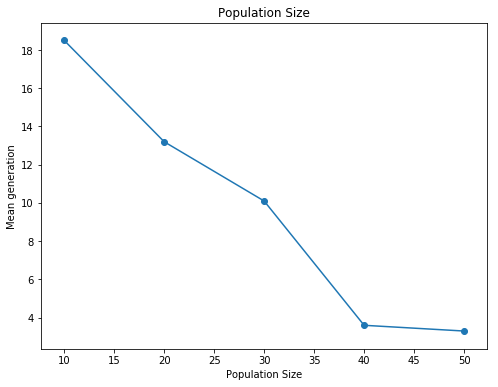

In [11]:
plt.figure(figsize=[8,6])
plt.title('Population Size')

#Evaluations
#Means
for i in range(len(Eval)):
	meanEval.append(sum(Eval[i])/itr)
	2#plt.axhline(y=sum(Eval[i])/itr,color="C"+str(i),linestyle='-.')
	print(meanEval)
plt.ylabel('Generation')
plt.xlabel('Test Case')


#Change in mean
plt.plot(legend,meanEval)													
plt.scatter(legend,meanEval)
plt.ylabel('Mean generation')
plt.xlabel('Population Size')

#plt.legend(legend, loc='upper left')
plt.show()

*It is observed that more population size leads to faster convergence*